**Importamos las librerias**

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
import tensorflow.keras.optimizers as Optimizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2
import scipy
import boto3


**Cargamos las imagenes de hombres para train y validation**

In [2]:
#IMAGENES HOMBRES TRAIN
hombres_train_folder_path="C:\\Users\\diazj\\Desktop\\ORT\\imagenes\\hombres_train\\"
hombres_train=[]
img_size=150
for img in os.listdir(hombres_train_folder_path):
    img = cv2.imread(os.path.join(hombres_train_folder_path,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    hombres_train.append(img_resize)
    
#IMAGENES HOMBRES VALIDATION
hombres_validation_folder_path="C:\\Users\\diazj\\Desktop\\ORT\\imagenes\\hombres_validation\\"
hombres_validation=[]
img_size=150
for img in os.listdir(hombres_validation_folder_path):
    img = cv2.imread(os.path.join(hombres_validation_folder_path,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    hombres_validation.append(img_resize)

In [3]:
hombres_train = np.array(hombres_train)
print(hombres_train.shape)

hombres_validation = np.array(hombres_validation)
print(hombres_validation.shape)


(380, 150, 150, 3)
(84, 150, 150, 3)


**Cargamos las imagenes de mujeres para train y validation**

In [4]:
#IMAGENES MUJERES TRAIN
mujeres_train_folder_path="C:\\Users\\diazj\\Desktop\\ORT\\imagenes\\mujeres_train\\"
mujeres_train=[]
img_size=150
for img in os.listdir(mujeres_train_folder_path):
    img = cv2.imread(os.path.join(mujeres_train_folder_path,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    mujeres_train.append(img_resize)
    
#IMAGENES MUJERES VALIDATION
mujeres_validation_folder_path="C:\\Users\\diazj\\Desktop\\ORT\\imagenes\\mujeres_validation\\"
mujeres_validation=[]
img_size=150
for img in os.listdir(mujeres_validation_folder_path):
    img = cv2.imread(os.path.join(mujeres_validation_folder_path,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    mujeres_validation.append(img_resize)

In [5]:
mujeres_train = np.array(mujeres_train)
print(mujeres_train.shape)
mujeres_validation = np.array(mujeres_validation)
print(mujeres_validation.shape)


(361, 150, 150, 3)
(64, 150, 150, 3)


**Vemos un ejemplo de imagen de hombre y mujer**

(150, 150, 3)


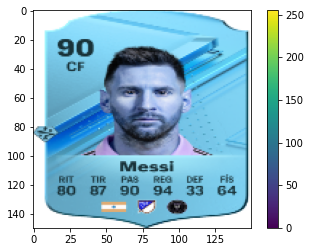

In [8]:
print(hombres_train[1].shape)
plt.figure()
plt.imshow(np.squeeze(hombres_train[4]))
plt.colorbar()
plt.grid(False)
plt.show()


(150, 150, 3)


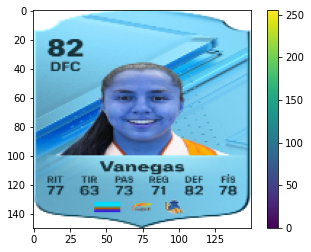

In [7]:
print(mujeres_train[1].shape)
plt.figure()
plt.imshow(np.squeeze(mujeres_train[360]))
plt.colorbar()
plt.grid(False)
plt.show()

**Unimos las imagenes de hombres y mujeres para train y validation**

In [9]:
#IMAGENES TRAIN
imagenes_train = np.concatenate([hombres_train,mujeres_train])
print(len(imagenes_train)) #imprimimos la longitud del arreglo que nos muestra la cantidad de imagenes
Imagenes_train = np.array(imagenes_train)
print(Imagenes_train.shape)

#IMAGENES VALIDATION
imagenes_validation = np.concatenate([hombres_validation,mujeres_validation])
print(len(imagenes_validation)) #imprimimos la longitud del arreglo que nos muestra la cantidad de imagenes
Imagenes_validation = np.array(imagenes_validation)
print(Imagenes_validation.shape)

741
(741, 150, 150, 3)
148
(148, 150, 150, 3)


In [10]:
Imagenes_train = np.array(Imagenes_train).astype(float)/255
Imagenes_validation = np.array(Imagenes_validation).astype(float)/255

#Labels_train = tf.keras.utils.to_categorical(Labels_train, 2)
#Labels_validation= tf.keras.utils.to_categorical(Labels_validation, 2)

**Cargamos las etiquetas de hombres para train y validation**

In [11]:
etiquetas_hombres_train = np.repeat(0,380)
print(len(etiquetas_hombres_train))
print(etiquetas_hombres_train)

etiquetas_hombres_validation = np.repeat(0,84)
print(len(etiquetas_hombres_validation))
print(etiquetas_hombres_validation)


380
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
84
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]


In [12]:
etiquetas_mujeres_train = np.repeat(1,361)
print(len(etiquetas_mujeres_train))
print(etiquetas_mujeres_train)

etiquetas_mujeres_validation = np.repeat(1,64)
print(len(etiquetas_mujeres_validation))
print(etiquetas_mujeres_validation)


361
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
64
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [13]:
class_names = ['HOMBRE','MUJER']
print(class_names)

['HOMBRE', 'MUJER']


**Unimos las etiquetas de hombres y mujeres para train y validation**

In [14]:
#ETIQUETAS ENTRENAMIENTO
labels_train = np.concatenate([etiquetas_hombres_train,etiquetas_mujeres_train])
print(len(labels_train))
print(labels_train)
Labels_train = np.array(labels_train)
print(Labels_train.shape)

#ETIQUETAS VALIDATION
labels_validation = np.concatenate([etiquetas_hombres_validation,etiquetas_mujeres_validation])
print(len(labels_validation))
print(labels_validation)
Labels_validation = np.array(labels_validation)
print(Labels_validation.shape)


741
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 

**Ploteamos varias imagenes del dataset final de train**

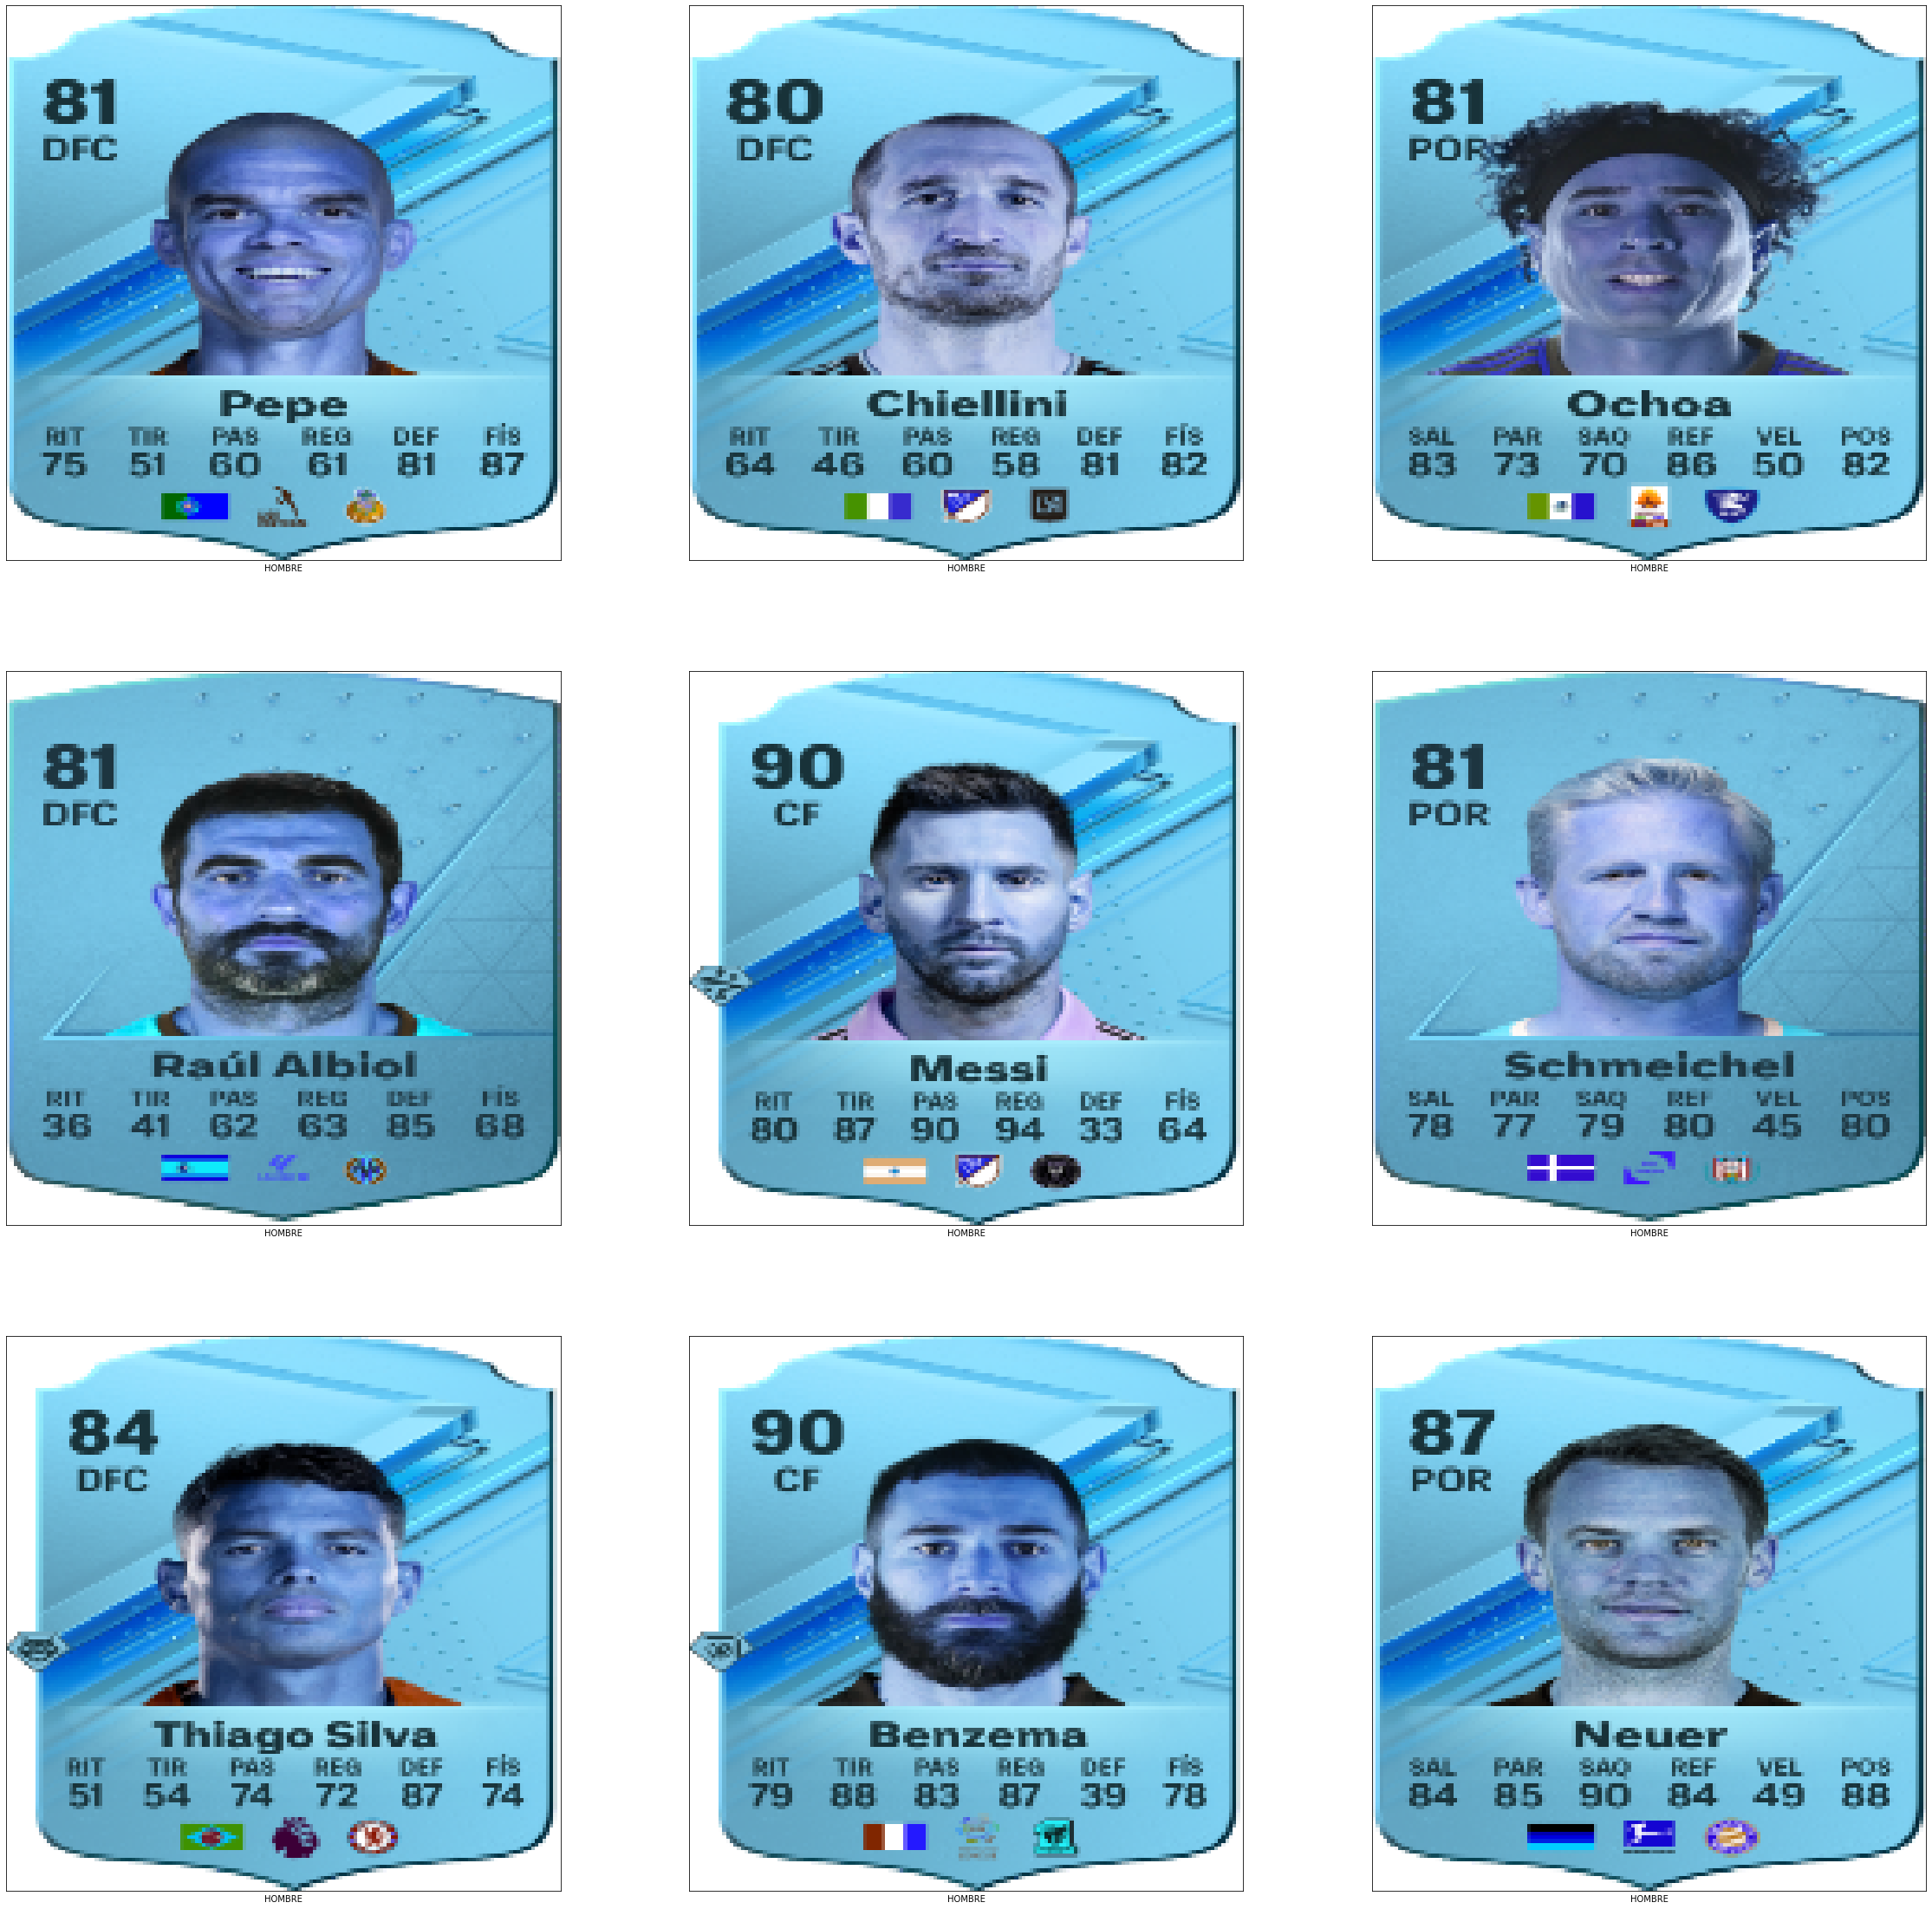

In [15]:
plt.figure(figsize=(40,40))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Imagenes_train[i])
    #, cmap=plt.cm.binary
    plt.xlabel(class_names[Labels_train[i]])
plt.show()

**Modelo**

In [16]:
# CCREAMOS GENERADORES DE DATOS
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

datagen.fit(Imagenes_train)

In [35]:
#SE DEFINE EL MODELO
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

#SE COMPILA EL MODELO
modelo.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#SE ENTRENA EL MODELO
#modelo.fit(Imagenes, Labels, epochs=5)
#trained=modelo.fit(Imagenes, Labels, epochs=5)
history = modelo.fit(datagen.flow(Imagenes_train, Labels_train, batch_size=64), epochs=15, validation_data=(Imagenes_validation, Labels_validation))



Epoch 1/15
12/12 [==============================] - 16s 1s/step - loss: 7.0958 - accuracy: 0.5789 - val_loss: 8.0993 - val_accuracy: 0.5676
Epoch 2/15
12/12 [==============================] - 13s 1s/step - loss: 0.6204 - accuracy: 0.6815 - val_loss: 6.1986 - val_accuracy: 0.5676
Epoch 3/15
12/12 [==============================] - 13s 1s/step - loss: 0.5048 - accuracy: 0.7746 - val_loss: 4.5220 - val_accuracy: 0.5676
Epoch 4/15
12/12 [==============================] - 13s 1s/step - loss: 0.4326 - accuracy: 0.8030 - val_loss: 1.6186 - val_accuracy: 0.5676
Epoch 5/15
12/12 [==============================] - 13s 1s/step - loss: 0.3374 - accuracy: 0.8596 - val_loss: 1.0134 - val_accuracy: 0.6149
Epoch 6/15
12/12 [==============================] - 14s 1s/step - loss: 0.2563 - accuracy: 0.8947 - val_loss: 0.6602 - val_accuracy: 0.6824
Epoch 7/15
12/12 [==============================] - 13s 1s/step - loss: 0.2154 - accuracy: 0.9204 - val_loss: 0.4914 - val_accuracy: 0.7703
Epoch 8/15
12/12 [==

**Ploteamos las metricas de evaluacion**

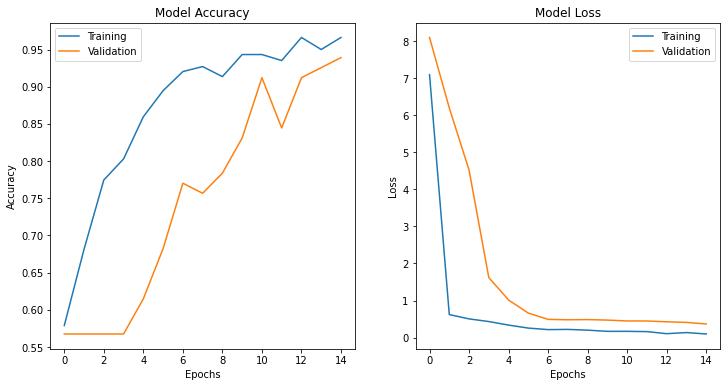

In [36]:
def plot_history(history):
    history_df = pd.DataFrame(history.history)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history_df['accuracy'], label='Training')
    plt.plot(history_df['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history_df['loss'], label='Training')
    plt.plot(history_df['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.savefig('training_validation_plots.png')
    plt.show()

# Call the plotting function to display the graphs
plot_history(history)

# Save the trained model
modelo.save('conv.h5')

Notas:

Si la loss en train baja y la loss en validation sube = overfitting

**Guardamos el artefacto en S3**

In [ ]:
# Nombre del archivo local y del bucket de S3
local_file_name = 'conv.h5'
s3_bucket_name = 'mlenprod'

# Ruta en S3 donde deseas almacenar el archivo
s3_key = 'artifacts/conv.h5'

# Crea una instancia del cliente S3
s3_client = boto3.client('s3')

# Sube el archivo a S3
s3_client.upload_file(local_file_name, s3_bucket_name, s3_key)

print(f'Archivo {local_file_name} subido exitosamente a {s3_key} en el bucket {s3_bucket_name}.')